<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

For this assignment, I am going using tax data from the US Department of Treasury containing information about income levels by state and zip code. I've chosen this data as I am using it for my final project so I thought I would take the opportunity to explore the data as part of this assigment. The original data is located at [data.gov](https://catalog.data.gov/dataset/zip-code-data), but for this assignment, as the original dataset is too large for GitHub, I will be using a subset of the data I have prepared for [my project](https://github.com/josh1den/DATA-602/blob/main/FINAL_PROJECT/SOURCE/irs_data.csv).

______________
# Data Exploration


In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read in the data
url = "https://raw.githubusercontent.com/josh1den/DATA-602/main/FINAL_PROJECT/SOURCE/irs_data.csv"
df = pd.read_csv(url)

# preview the dataframe
df.head()

,state,zip,num_returns,num_indiv,agi,total_income
0,AL,0,778210.0,1161150.0,10158838.0,10311099.0
1,AL,0,525940.0,992420.0,18974967.0,19145621.0
2,AL,0,285700.0,595680.0,17535801.0,17690402.0
3,AL,0,179070.0,432180.0,15546951.0,15670456.0
4,AL,0,257010.0,692450.0,34974856.0,35286228.0


In [6]:
df.describe()

,zip,num_returns,num_indiv,agi,total_income
count,166159.000000,1.661590e+05,1.661590e+05,1.661590e+05,1.661590e+05
mean,48859.485553,1.860508e+03,3.475644e+03,1.448890e+05,1.465601e+05
std,27167.679271,3.722335e+04,6.520368e+04,3.411411e+06,3.449896e+06
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,27020.000000,7.000000e+01,1.500000e+02,4.556000e+03,4.610500e+03
50%,48843.000000,2.600000e+02,5.300000e+02,1.697200e+04,1.717500e+04
75%,70652.500000,1.080000e+03,2.090000e+03,6.707800e+04,6.793600e+04
max,99999.000000,5.506120e+06,8.181990e+06,7.683582e+08,7.773145e+08


Odd that there's a minimum of zero. Will take a look in wrangling. 

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [26]:
# view totals by state
by_state = df.groupby("state")[["num_returns","num_indiv","agi","total_income"]].sum().reset_index()
by_state.head()

,state,num_returns,num_indiv,agi,total_income
0,AK,703670.0,1297910.0,5.283171e+07,5.338728e+07
1,AL,4203010.0,8172800.0,2.616301e+08,2.642595e+08
2,AR,2532820.0,5017350.0,1.540693e+08,1.555030e+08
3,AZ,6467170.0,12408850.0,4.592562e+08,4.641935e+08
4,CA,36670260.0,70133090.0,3.358923e+09,3.399587e+09


In [5]:
by_state.isna().sum()

num_returns     0
num_indiv       0
agi             0
total_income    0
dtype: int64

In [17]:
by_state.describe()

,num_returns,num_indiv,agi,total_income
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,6.061572e+06,1.132372e+07,4.720512e+08,4.774958e+08
std,6.905389e+06,1.306181e+07,5.962637e+08,6.031419e+08
min,5.503100e+05,1.046180e+06,4.502834e+07,4.574175e+07
25%,1.579265e+06,3.107425e+06,1.107480e+08,1.120052e+08
50%,4.020520e+06,7.426040e+06,2.616301e+08,2.642595e+08
75%,7.154530e+06,1.314124e+07,6.466427e+08,6.539656e+08
max,3.667026e+07,7.013309e+07,3.358923e+09,3.399587e+09


Grouping by state resolved the problem of zero entries by zip code.

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



## Using Matplotlib

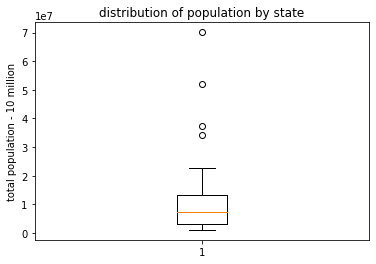

In [16]:
# boxplot of total distribution:
plt.boxplot(by_state.num_indiv)
plt.ylabel("total population - 10 million")
plt.title("distribution of population by state")
plt.show()

We can see the median population of about 7.5 million -- with half the states between 3-13m as seen in the summary statistic, and we can see that there are four outliers among states, with populations of over 30 million, with the maximum population just over 70 million. Let's take a look at a scatterplot of population versus total income, expecting a linear relationship:

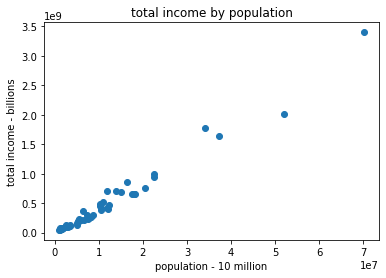

In [20]:
plt.scatter(by_state.num_indiv, by_state.total_income)
plt.xlabel("population - 10 million")
plt.ylabel("total income - billions")
plt.title("total income by population")
plt.show()

Build a linear regression model from the data and fit to plot:

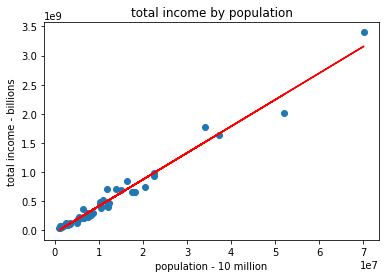

In [22]:
# convert columns to arrays
x = np.array(by_state.num_indiv)
y = np.array(by_state.total_income)
# obtain slope (m) and intercept (b) of linear regression line 
m, b = np.polyfit(x, y, 1)
# add the original plot
plt.scatter(by_state.num_indiv, by_state.total_income)
plt.xlabel("population - 10 million")
plt.ylabel("total income - billions")
plt.title("total income by population")
# plot the regression line on top of the plot
plt.plot(x, m*x+b, color='red')
plt.show();

We can take a look at a histogram of the income distribution by state:

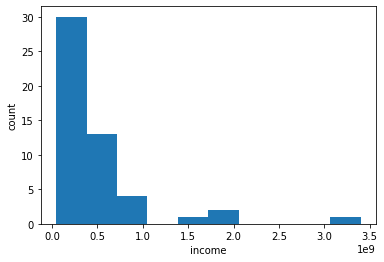

In [39]:
plt.hist(by_state.total_income)
plt.xlabel("income")
plt.ylabel("count")
plt.show;

We can see 30 of the states have total incomes under half a billion. Let's look at the actual incomes by state:

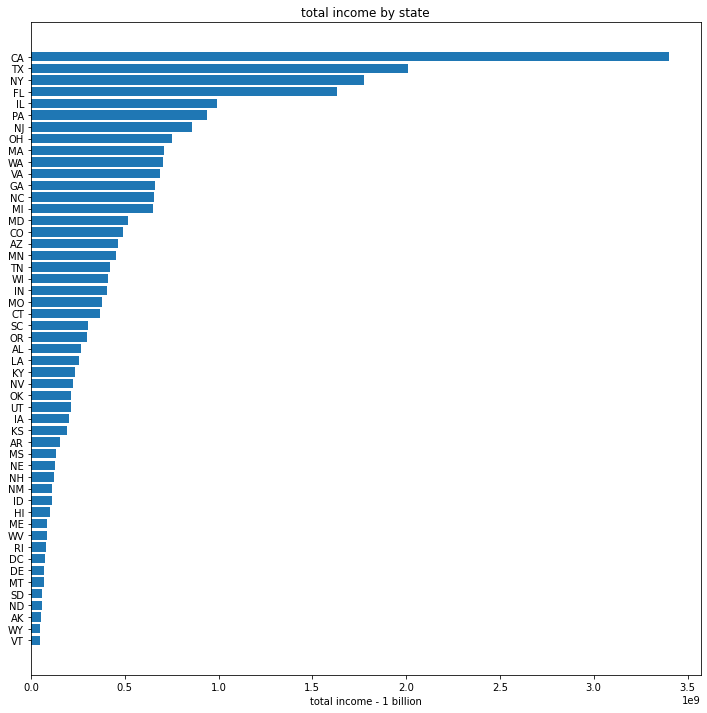

In [53]:
# sort the dataframe by total income
by_state = by_state.sort_values(by="total_income")
b

We see the four largest total incomes belong to CA, TX, NY, and FL. What about per capita?

In [57]:
# create income_per_capita column
by_state["income_per_capita"] = by_state["total_income"] / by_state["num_indiv"]
by_state = by_state.sort_values(by="income_per_capita")
by_state.head()

,state,num_returns,num_indiv,agi,total_income,income_per_capita
25,MS,2522220.0,4969590.0,133640580.0,1.351450e+08,27.194402
49,WV,1541050.0,2922890.0,86229580.0,8.702533e+07,29.773728
2,AR,2532820.0,5017350.0,154069308.0,1.555030e+08,30.993053
17,KY,3874880.0,7426040.0,233525942.0,2.359119e+08,31.768197
32,NM,1888250.0,3542400.0,111752290.0,1.128669e+08,31.861706


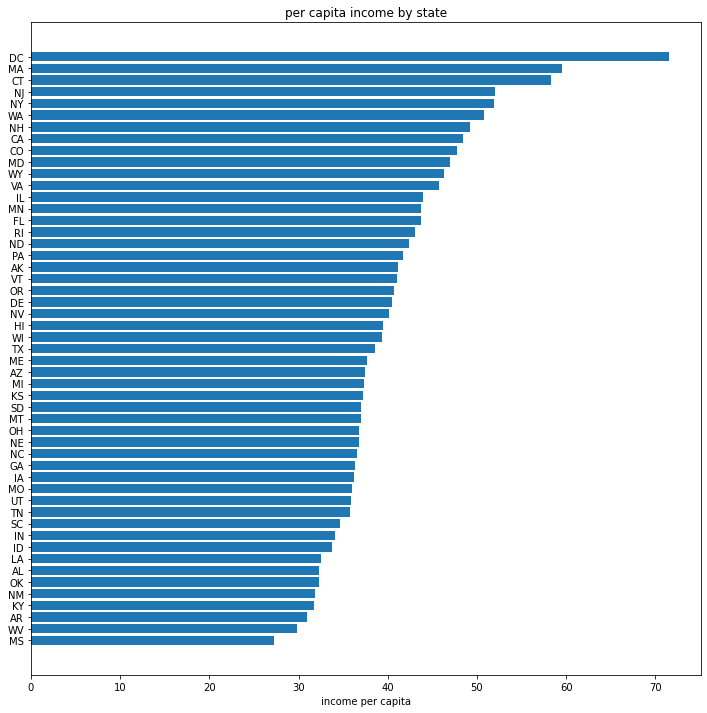

In [58]:
# resize the figure so we can see the labels on the y-axis
plt.figure(figsize=[12,12])
# plot the barchart
plt.barh(by_state.state, width=by_state.income_per_capita)
plt.xlabel("income per capita")
plt.title("per capita income by state")
plt.show();

This gives us a better idea which states are the *wealthiest* per capita -- DC, followed by MA and CT. NY and CA both appear towards the top but not to the same degree as total income. 

## Using Seaborn

/Users/joshiden/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


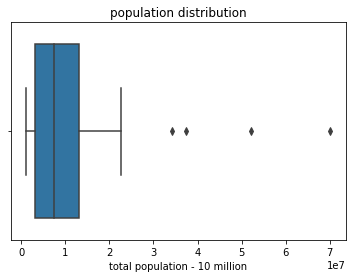

In [62]:
# create a boxplot of num_indiv using seaborn
sns.boxplot(by_state.num_indiv)
plt.xlabel("total population - 10 million")
plt.title("population distribution");

Seaborn boxplot default is horizontal. The default includes color and omits the tick label along the variable axis. By default it is immediately more visually striking. 

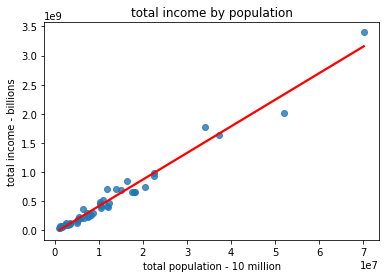

In [73]:
# plot a regression in seaborn
sns.regplot(x="num_indiv", y="total_income", data=by_state, line_kws={"color":"red"}, ci=None)
plt.xlabel("total population - 10 million")
plt.ylabel("total income - billions")
plt.title("total income by population");

Seaborn can calculate and plot a regression in a single line of code. The default call to regplot includes a confidence interval for the regression. Passing None in to the ci argument removes this confidence interval. The default regression line in seaborn is blue -- passing a dictionary containing a key-value pair for color into the line_kws argument will set the color for the regression line. 

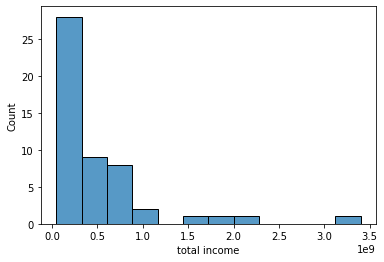

In [77]:
# plot a histogram
sns.histplot(x="total_income", data=by_state)
plt.xlabel("total income");

Again, seaborn adds some default characteristics that makes the visualization more eye-catching: count is automatically added to the y-axis, binning is more intuitive, and bars automatically have borders. 

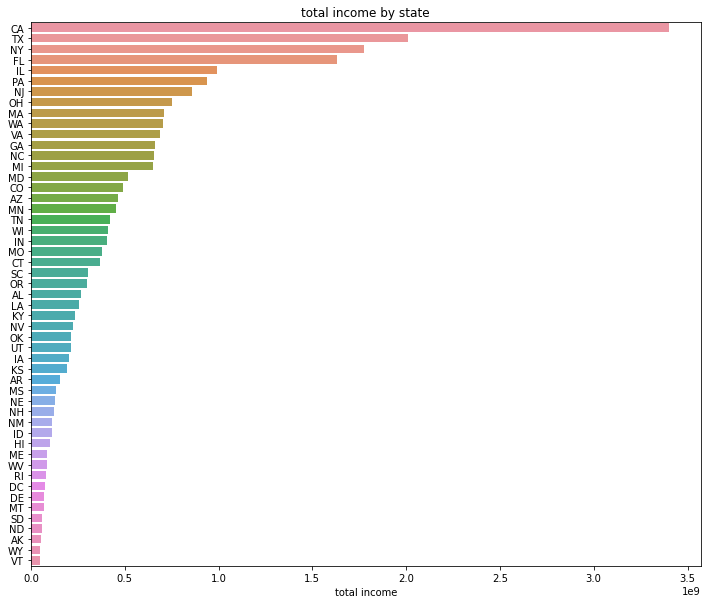

In [82]:
# barplot in seaborn
# sort values by total_income
by_state = by_state.sort_values(by="total_income", ascending=False)
# set the figure size
plt.figure(figsize=[12,10])
sns.barplot(x="total_income", y="state", data=by_state)
plt.title("total income by state")
plt.ylabel("")
plt.xlabel("total income");

Seaborn by default adds color to the barplot, and you can also see that the top and bottom margins are better formatted to reduce whitespace.

# Conclusions  

Seaborn functions produce default graphics which improve upon matplotlib, and offer optional arguments to further customize visualizations. However, matplotlib in conjunction with seaborn offers the greatest functionality to produce striking, informative graphics. 